# Welcome to Digit recognization problem from Kaggle

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from tf_utils import *

Using TensorFlow backend.


In [2]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [3]:
features = np.array(train_data.iloc[:, 1:785])
labels = np.array(train_data.iloc[:, 0])
test_data = np.array(test_data)
labels.shape

(42000,)

In [4]:
def one_hot_matrix(labels, C):
    C = tf.constant(C, name = "C")
    
    one_hot_matrix = tf.one_hot(indices = labels , depth = C, axis = 0 )
    
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
        
    return one_hot

In [5]:
labels = one_hot_matrix(labels, C = 10).T

In [6]:
print(features.shape)
print(labels.shape)

(42000, 784)
(42000, 10)


In [7]:
features = features.reshape(42000, 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)
print(features.shape)
print(test_data.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [8]:
X_train = features[:35000,:,:,:]
Y_train = labels[:35000,:]
X_test = features[35000:,:,:,:]
Y_test = labels[35000:,:]

In [9]:
def digit_recognizer_model(input_shape):
    
    X_input = Input(input_shape)
    X = ZeroPadding2D((2,2))(X_input)
    X = Conv2D(6, (5, 5), strides = 1, name='conv0')(X)
    X = Activation('relu')(X)
    
    X = AveragePooling2D((2,2), strides = 2, name = 'max_pool0')(X)
    
    X = Conv2D(16, (5, 5), strides = 1, name='conv1')(X)
    X = Activation('relu')(X)
    
    X = AveragePooling2D((2,2), strides = 2, name = 'max_pool1')(X)
    X = Flatten()(X)
    
    X = Dense(120, activation = 'relu', name = 'fc0')(X)
    X = Dense(84, activation = 'relu', name ='fc1')(X)
    X = Dense(10, activation = 'softmax', name = 'softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name = "digit_reconizer")
    
    return model
    

In [10]:
model = digit_recognizer_model((features.shape[1], features.shape[2], features.shape[3]))

In [11]:
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

In [16]:
model.fit(x = features, y = labels, epochs = 10, batch_size = 200)

Epoch 1/10
42000/42000 [==============================] - 46s 1ms/step - loss: 0.0364 - acc: 0.9890
Epoch 2/10
42000/42000 [==============================] - 41s 967us/step - loss: 0.0260 - acc: 0.9921
Epoch 3/10
42000/42000 [==============================] - 42s 1ms/step - loss: 0.0247 - acc: 0.9924
Epoch 4/10
42000/42000 [==============================] - 42s 1ms/step - loss: 0.0193 - acc: 0.9941
Epoch 5/10
42000/42000 [==============================] - 45s 1ms/step - loss: 0.0165 - acc: 0.9943
Epoch 6/10
42000/42000 [==============================] - 44s 1ms/step - loss: 0.0156 - acc: 0.9948
Epoch 7/10
42000/42000 [==============================] - 44s 1ms/step - loss: 0.0141 - acc: 0.9952
Epoch 8/10
42000/42000 [==============================] - 42s 1ms/step - loss: 0.0161 - acc: 0.9944
Epoch 9/10
42000/42000 [==============================] - 43s 1ms/step - loss: 0.0111 - acc: 0.9961
Epoch 10/10
42000/42000 [==============================] - 44s 1ms/step - loss: 0.0157 - acc: 0.99

In [21]:
pred = model.evaluate(x = X_test, y = Y_test)

7000/7000 [==============================] - 4s 614us/step


In [22]:
print("Accuracy: ", pred[1])

Accuracy:  0.9931428571428571


In [29]:
prediction = model.predict(test_data)

In [30]:
print(prediction.shape)

(28000, 10)


In [31]:
def max_arg(one_hot):
    
    arg_max = tf.argmax(one_hot, axis = 1)
    
    sess = tf.Session()
    arg_max = sess.run(arg_max)
    sess.close()
        
    return arg_max

In [39]:
predict = max_arg(prediction).reshape(1,-1)
print(predict.shape)
predict

(1, 28000)


array([[2, 0, 9, ..., 3, 9, 2]], dtype=int64)

In [38]:
image_id = [i for i in range(1,28001)]


28000

In [41]:
label = []
for i in range(28000):
    label.append(predict[0][i])

In [44]:
data = {"ImageId": image_id, "Label": label}
data = pd.DataFrame(data)
data.to_csv('prediction.csv')

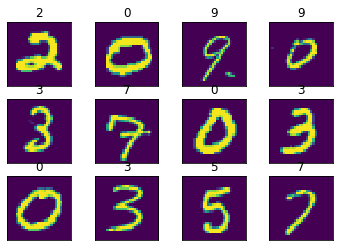

In [49]:
import scipy
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
#my_image = X_test[:,5].reshape((-1,1))

fig=plt.figure()

for num,data in enumerate(test_data[:12,:,:,:]):
    # cat: [1,0]
    # dog: [0,1]
    img_data = data.reshape(28, 28)
    
    y = fig.add_subplot(3,4,num+1)
    img_prediction = predict[0][num]
    
    y.imshow(img_data)
    
    plt.title(img_prediction)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()


<h2 style="color:red">Result:</h2><b><i>Got 98.23% accuracy.</i></b>